# **Libraries**

*Set* your local "google_drive_path" that you uploaded the code in it

In [ ]:
Your_google_drive_path="/content/drive/MyDrive/DeepGDPaper"

In [ ]:
from numpy import argmax
import random
import seaborn as sbn
from numpy.random import rand, randn
from scipy.linalg import qr
from numpy import ones
from scipy import stats
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA
import  array
import math
# from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from sklearn import linear_model
import sklearn
from tabulate import tabulate
from math import sqrt
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.decomposition import PCA as sklearnPCA
import copy
import time
from keras import backend as K
import argparse
import shutil
import warnings
import keras.backend as KeyboardInterrupt
from keras.regularizers import l2
from keras.models import load_model, Model
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
from keras.datasets import mnist, cifar10 , fashion_mnist, cifar100
import sys
from numpy.core.defchararray import array
sys.path.append('..')


!pwd
import os
os.chdir(str(Your_google_drive_path))
!pwd

!pip install pymoo
from pymoo.core.duplicate import ElementwiseDuplicateElimination
from pymoo.core.mutation import Mutation
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.crossover import Crossover
from pymoo.core.sampling import Sampling

/content
/content/drive/MyDrive/DeepGDPaper
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210079 sha256=c8aa47e01e7ec270b78b7ae149ca5f7fdbfb386c7a950b77d323c56a6140129d
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


## **Dataset and Models**

In [ ]:
############################################## Dataset $ model  ########################################################################
#############################################Function description#######################################################################

#________________________________________________(dataset)___________________________________________________________
#It takes the name of the dataset , and corresponding model from the user then it preprocess the dataset and load the model.
#______________Input: arg ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Training and Testing set of the given dataset
#______________________2- the noramlized version of feature matrix of the given dataset (VGG features)
#______________________3- load the trained model on the given dataset

#Normalization
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom

def dataset(arg, model_name):
  CLIP_MIN = -0.5
  CLIP_MAX = 0.5

  if arg=="mnist":
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    # ##Model
    if model_name=="LeNet1":
        model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    if model_name=="LeNet5":
        model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    ##VGG feature extaction (4068)
    ##rank of features (2476)
    #You can use the stored verion or call vgg function to extract features(to do so comment out the second line)
    # MNIST_VGG=np.load(str(Your_google_drive_path)+"/Extracted Features/MNIST/block5_conv3_3_3_512.npy")
    _,MNIST_VGG=vgg16_features_GD("mnist")
    features_vgg=MNIST_VGG
    y_test = to_categorical(y_test, 10)
    y_test=np.argmax(y_test, axis=1)
    y_train = to_categorical(y_train, 10)

  if arg=="Fashion_mnist":
    # load dataset
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    _,features_vgg=vgg16_features_GD("Fashion_mnist")
    if model_name=="LeNet4":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
      y_test = to_categorical(y_test, 10)
      y_test=np.argmax(y_test, axis=1)
      y_train = to_categorical(y_train, 10)


  if arg=="SVHN":
    train_raw = loadmat(str(Your_google_drive_path)+'/Data/train_32x32.mat')
    test_raw = loadmat(str(Your_google_drive_path)+'/Data/test_32x32.mat')
    x_train = np.array(train_raw['X'])
    x_test = np.array(test_raw['X'])
    y_train = train_raw['y']
    y_test = test_raw['y']
    x_train = np.moveaxis(x_train, -1, 0)
    x_test = np.moveaxis(x_test, -1, 0)
    x_test= x_test.reshape (-1,32,32,3)
    x_train= x_train.reshape (-1,32,32,3)
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    _,features_vgg=vgg16_features_GD("SVHN")
    if model_name=="LeNet5":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
      lb = LabelBinarizer()
      y_train = lb.fit_transform(y_train)
      y_test = lb.fit_transform(y_test)
      y_test=np.argmax(y_test, axis=1)

  if arg=="cifar10":
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype("float32")
    x_test = x_test.astype("float32")
    if model_name=="12Conv":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")
    if model_name=="ResNet20":
      model =  load_model(str(Your_google_drive_path)+"/Retraining/Org_model/model_"+str(arg)+"_"+str(model_name)+".h5")

    #VGG feature extaction (4068)
    #rank of features (3845)
    #You can use the stored verion or call vgg function to extract features (comment out the second line)
    # Cifar_VGG=np.load(str(Your_google_drive_path)+"/Extracted Features/Cifar10/x_cifar_inputshape48_block5_conv3.npy")
    _,Cifar_VGG=vgg16_features_GD("cifar10")
    features_vgg=Cifar_VGG

    y_test = to_categorical(y_test, 10)
    y_test=np.argmax(y_test, axis=1)
    y_train = to_categorical(y_train, 10)

  x_train = (x_train / 255.0) - (1.0 - CLIP_MAX)
  x_test = (x_test / 255.0) - (1.0 - CLIP_MAX)

  return x_train, y_train, x_test, y_test,features_vgg , model


## **Feature Extraction**

In [ ]:
#________________________________________________(vgg16_features_GD)___________________________________________________________
#It needs the name of the dataset , then it extract the features of this datasets by using VGG16 (the internal layer: 'block5_conv3')
#to have enough number of features for calculating the GD (geometric diversity score)

#______________Input: arg ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Original Feature Matrix of test inputs of the given dataset (features)
#______________________2- the noramlized version of feature matrix between 0 and 1 (X_scf)


def vgg16_features_GD(arg):

  CLIP_MIN = -0.5
  CLIP_MAX = 0.5
    # lb = LabelBinarizer()
    # train_labels = lb.fit_transform(train_labels)
    # test_labels = lb.fit_transform(test_labels)
  if (arg=="cifar10" or arg=="cifar100" or arg=="SVHN"):
    if(arg=="cifar10"):
      (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    if(arg=="cifar100"):
      (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    if (arg=="SVHN"):
      train_raw = loadmat(str(Your_google_drive_path)+'/Data/train_32x32.mat')
      test_raw = loadmat(str(Your_google_drive_path)+'/Data/test_32x32.mat')
      x_train = np.array(train_raw['X'])
      x_test = np.array(test_raw['X'])
      y_train = train_raw['y']
      y_test = test_raw['y']
      x_train = np.moveaxis(x_train, -1, 0)
      x_test = np.moveaxis(x_test, -1, 0)
      # lb = LabelBinarizer()
      # train_labels = lb.fit_transform(train_labels)
      # test_labels = lb.fit_transform(test_labels)

    x_test1= x_test.reshape (-1,32,32,3)

  if (arg =="mnist" or arg=="Fashion_mnist"):
    if (arg=="mnist"):
      (x_train, y_train), (x_test, y_test) = mnist.load_data()
    if(arg=="Fashion_mnist"):
      (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_test1=np.dstack([x_test]*3)
    x_test1= x_test1.reshape(-1,28,28,3)
    #Resize the images 48*48 as required by VGG16

  x_test1 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test1])

  x_test1 = x_test1.astype("float32")
  x_test1 = (x_test1 / 255.0) - (1.0 - CLIP_MAX)
  input_layer=layers.Input(shape=(48,48,3))
  model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
  model_vgg16.summary()
  base_model = model_vgg16
  # You can select another layer of VGG16 that you want to test.
  name_layer = 'block5_conv3'
  intermediate_layer_model = Model(inputs=base_model.input, outputs=base_model.get_layer(name_layer).output)
  FF = intermediate_layer_model.predict(x_test1)
  features= FF.reshape((len(x_test1),9*512))
  # print("rank of feature matrix", np.linalg.matrix_rank(features))
  nom = (features-features.min(axis=0))*(1-0)
  denom = features.max(axis=0) - features.min(axis=0)
  denom[denom==0] = 1
  X_scf = nom/denom
  print(X_scf)
  print("rank of feature matrix", np.linalg.matrix_rank(X_scf))

  return features, X_scf

## **Fault definition**


In [ ]:

#________________________________________________(FaultFunction)___________________________________________________________
#It takes the name of the dataset , and corresponding model name then it loads the HDBSCAN clustering results of mispredicted inputs (from fault definition file).
#and it returns all necessary inforamtions about clustering, best clustering results after hyperparameter tuneing (index_clustering) and mispredicted inputs

#______________Input: dataset ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist") model_name("LeNet1", "LeNet5","LeNet4","12Conv","ResNet20" ), dataset ("cifar10","cifar100", "SVHN","mnist","Fashion_mnist")
#______________Output: 1- Training and Testing set of the given dataset
#______________________2- the noramlized version of feature matrix of the given dataset (VGG features)
#______________________3- load the trained model on the given dataset




def FaultFunction(data_name,model_name):
  i=0
  if model_name=="LeNet1" and data_name=="mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/top_clustering_label_2coulmns2.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/mis_index_testdataset_MNIST_LeNet1.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet1_BBMNIST/mis_index_traindataset_MNIST_LeNet1.npy")
    index_clustering_config=2
  if model_name=="LeNet5" and data_name=="mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/all_test_CL_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/mis_index_testdataset_MNIST.npy",allow_pickle=True)
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/mis_index_traindataset_MNIST.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_BBMNIST/top_clustering_label_2coulmns.npy")
    index_clustering_config=4

  if model_name=="12Conv" and data_name=="cifar10":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/Three_clustering_labels3(2coulmns).npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/mis_index_testdatasetcifar.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/Cifar_12conv_BB/mis_index_traindatasetcifar.npy")
    index_clustering_config=0
  if model_name=="ResNet20" and data_name=="cifar10":
    all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/mis_index_testdataset_cifRes.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/ResNet20_Cifar10/mis_index_traindataset_cifRes.npy")
    index_clustering_config=4

  if model_name=="LeNet4" and data_name=="Fashion_mnist":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/mis_index_testdataset_FMNIST.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet4_fashion_MNIST/mis_index_traindataset_FMNIST.npy")
    index_clustering_config=13
  if model_name=="LeNet5" and data_name=="SVHN":
    # all_test_cl_labels=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/all_test_CL_labels.npy")
    clustering_result=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/Three_clustering_labels.npy")
    mis_ind_test=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/mis_index_testdataset_SVHN.npy")
    mis_ind_train=np.load(str(Your_google_drive_path)+"/Fault_clusters/LeNet5_SVHN/mis_index_traindataset_SVHN.npy")
    index_clustering_config=15

  noisy_index=[]
  for i in range(len(mis_ind_test)):
    if clustering_result[index_clustering_config][i]==-1:
      noisy_index.append(mis_ind_test[i])
  sett=list(range(0, len(x_test)))
  index_withoutnoisy=set(sett)-set(noisy_index)
  id_test=index_withoutnoisy

  return clustering_result[index_clustering_config],noisy_index, index_withoutnoisy, mis_ind_test, mis_ind_train

# Fault function

In [ ]:


def faults(n_samples, sample, mis_i):
  i=0
  pos=0
  neg=0
  i=0
  cluster_lab=[]
  nn=-1
  for l in sample:
    if l in list(mis_ind_test):
      neg=neg+1
      # print("index mis",l)
      ind=list(mis_ind_test).index(l)
      if (Clustering_labels[ind]>-1):
        cluster_lab.append(Clustering_labels[ind])
      if (Clustering_labels[ind]==-1):
        cluster_lab.append(nn)
        nn=nn-1
    else:
      pos=pos+1

    # i=i+1
  faults_n=len(list(set(cluster_lab)))

  cluster_1noisy=copy.deepcopy(cluster_lab)
  for i in range(len(cluster_1noisy)):
   if cluster_1noisy[i] <=-1:
     cluster_1noisy[i]=-1
  faults_1noisy=len(list(set(cluster_1noisy)))
  return faults_n,faults_1noisy, neg

# Fitness Functions

In [ ]:

############################################################## Gini score  ##############################################################################


def gini_score(Output_probability):
  gini_scores=[]
  for i in range(len(Output_probability)):
    sum=0
    for j in range(len(Output_probability[0])):
      sum= sum + Output_probability[i][j]**2
    gini_scores.append(1-sum)
  return gini_scores




In [ ]:

############################################################## Geometric diversity ##############################################################


import numpy as np

def GD(IDs, features):

    selected_features = features[list(IDs)]
    dot_p = np.dot(selected_features, selected_features.T)
    sign, Log_det = np.linalg.slogdet(dot_p)
    return Log_det


#**Main (Call Functions)**

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [ ]:
1############################################################## Call_functions  ##########################################

data_name=input("Enter the dataset             mnist       /        cifar10       / Fashion_mnist /  SVHN  : ")
model_name=input("Enter the model name    LeNet1 or LeNet5/  12Conv or ResNet20  /     LeNet4    /  LeNet5 : ")
x_train, y_train, x_test, y_test, features, model= dataset(data_name, model_name)
print(data_name, model_name)
model.summary()
print("x_test.shape", x_test.shape)
Clustering_labels, noisy_index , index_withoutnoisy, mis_ind_test, mis_ind_train= FaultFunction(data_name, model_name)
Clustering_labels=Clustering_labels[:len(mis_ind_test)]

Output_probability=model.predict(x_test)
Gini_scores=gini_score(Output_probability)

Enter the dataset             mnist       /        cifar10       / Fashion_mnist /  SVHN  : cifar10
Enter the model name    LeNet1 or LeNet5/  12Conv or ResNet20  /     LeNet4    /  LeNet5 : 12Conv
58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856  

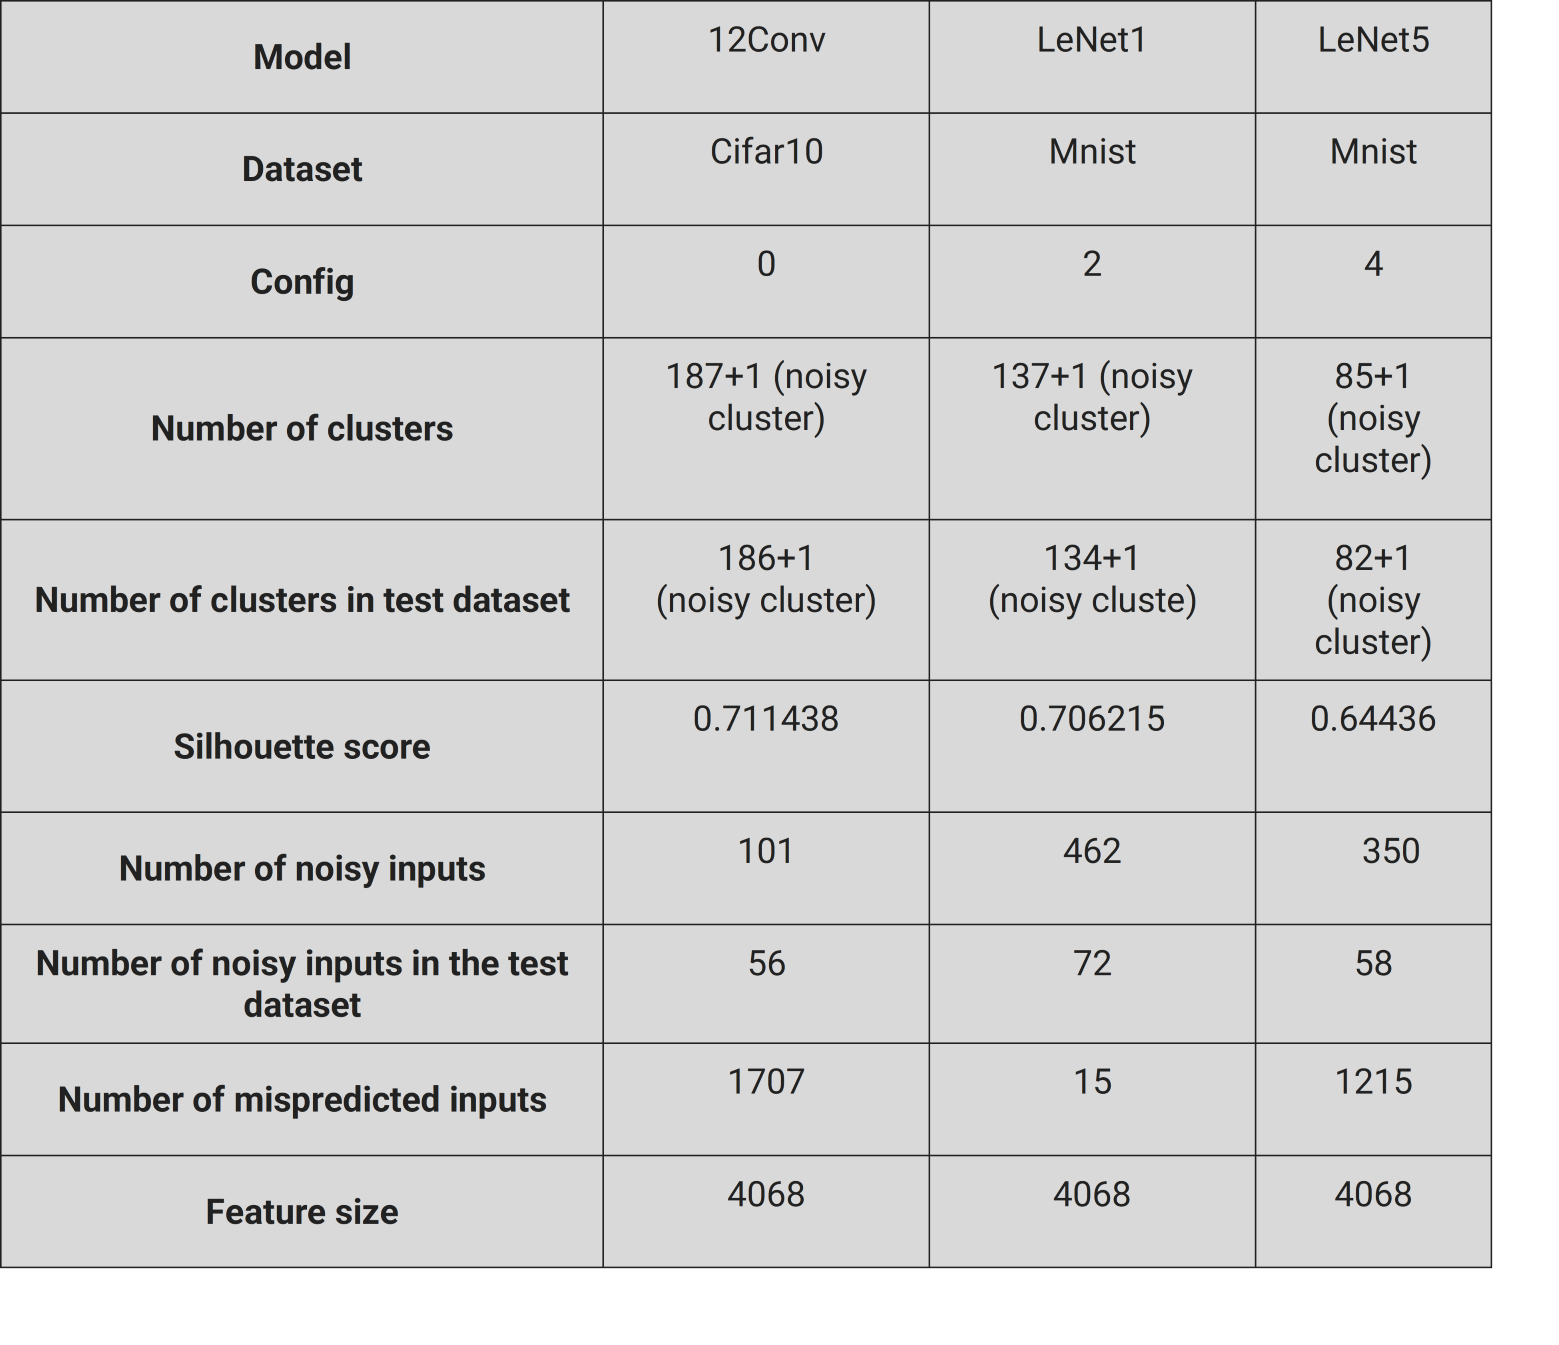

In [ ]:
noisy_index=[]
sss=[]
for i in range(len(mis_ind_test)):
  sss.append(Clustering_labels[i])
  if Clustering_labels[i]==-1:
    noisy_index.append(mis_ind_test[i])
sett=list(range(0, len(x_test)))
index_withoutnoisy=set(sett)-set(noisy_index)

# **DeepGD**

In [ ]:
import time

import multiprocessing
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.core.callback import Callback
import string
import numpy as np
from pymoo.factory import get_sampling
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.core.callback import Callback
import string
import numpy as np
from pymoo.factory import get_sampling
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

import matplotlib.pyplot as plt
import numpy as np
from pymoo.factory import get_algorithm
from pymoo.visualization.scatter import Scatter

from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.core.callback import Callback
import string
import numpy as np
from pymoo.factory import get_sampling
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

import random
import numpy as np
from pymoo.core.callback import Callback
import cProfile

ID=300
size_ind=100
n_gen=30
p_size=700
n_off=500
m_rate=0.7

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=size_ind, n_obj=2, n_constr=0,xl=0, xu=len(x_test)-1, type_var=list)

    def _evaluate(self, x, out, *args, **kwargs):

        # Opt version: Calculate the average Gini score
        Ave_gini = np.mean([Gini_scores[c] for c in x])


        # print(type(x))
        div_score= GD(x, features)
        fit1 = Ave_gini
        fit2 = abs(div_score)

        out["F"] = np.array([-fit1, -fit2], dtype=float)


class MySampling(Sampling):

    def _do(self, problem, n_samples, **kwargs):
        X=np.full((n_samples,problem.n_var), None, dtype=object)

        for i in range(n_samples):
          X[i]=np.asarray(random.sample(list(index_withoutnoisy),problem.n_var))
        return X


#original
class MyCrossover(Crossover):
    def __init__(self):
        # define the crossover: number of parents and number of offsprings
        super().__init__(2, 2)

    def _do(self, problem, X, **kwargs):
        # The input of has the following shape (n_parents, n_matings, n_var)
        _, n_matings, n_var = X.shape
        def pri(xx):
          gini_X=[Gini_scores[i] for i in xx]
          zipped_lists = zip(gini_X,xx)
          #sort from the highest gini score to the lowest
          sorted_zipped_lists = sorted(zipped_lists, reverse=True)
          sorted_list1 = [element for _, element in sorted_zipped_lists]
          return sorted_list1
        # The output owith the shape (n_offsprings, n_matings, n_var)
        Y = np.full_like(X, None, dtype=object)
        # # for each mating provided
        for k in range(n_matings):
            a = pri(X[0,k])
            b = pri(X[1,k])
            crossoverpoint = random.randint(1, (n_var-1))
            off1 = list(a[:crossoverpoint])+list(b[:len(b)-crossoverpoint])
            off2 = list(b[len(b)-crossoverpoint:])+list(a[crossoverpoint:])
            # # prepare the offsprings

            off1_final=off1
            off2_final=off2

              # join the character list and set the output
            if len(set(off1))<n_var:
              Rsize=n_var-len(set(off1))
              off1_replace=random.sample(list(set(index_withoutnoisy)-set(off1)),Rsize)
              off1=list(set(off1))
              off1.extend(set(off1_replace))
            if len(set(off2))<n_var:
              Rsize=n_var-len(set(off2))
              off2_replace=random.sample(list(set(index_withoutnoisy)-set(off2)),Rsize)
              off2=list(set(off2))
              off2.extend(set(off2_replace))

            Y[0, k], Y[1, k] = np.array(off1), np.array(off2)
        return Y


class MyMutation(Mutation):
    def __init__(self):
        super().__init__()

    def _do(self, problem, X, **kwargs):

      def pri(xx):
          gini_X=[Gini_scores[i] for i in xx]
          zipped_lists = zip(gini_X,xx)
          #sort from the highest gini score to the lowest
          sorted_zipped_lists = sorted(zipped_lists, reverse=True)
          sorted_list1 = [element for _, element in sorted_zipped_lists]
          return sorted_list1

      mutation_rate= m_rate
      mut=np.full_like(X, None, dtype=object)
      for i in range(len(X)):
          random_value=random.random()
          N_least=int(size_ind/100)
          ff =len(X[i])-N_least
          gd_scores_mut=[]
          xx=pri(X[i])
          if random_value <= mutation_rate:
            while ff<len(X[i]):
              b = xx[:ff] + xx[ff+1:]
              ss=GD(b, features)
              gd_scores_mut.append(ss)
              ff=ff+1
            xx[len(X[i])-N_least+gd_scores_mut.index(max(gd_scores_mut))]=random.choice(list(set(index_withoutnoisy)-set(X[i])))
            mut[i]=np.array(xx)
          else:
            mut[i]=X[i]
      ###########################################

      return mut

class MyDuplicateElimination(ElementwiseDuplicateElimination):
    def is_equal(self, a, b):
        return np.array_equal(a.X, b.X)

problem=MyProblem()

algorithm = NSGA2(pop_size=p_size,
                  n_offsprings=n_off,
                  sampling=MySampling(),
                  crossover=MyCrossover(),
                  mutation=MyMutation(),
                  eliminate_duplicates=MyDuplicateElimination())


res = minimize(problem,
              algorithm,
              ('n_gen', n_gen),
              verbose=False)


F = res.F
X=res.X
print(F)
print(GD(X[0], features))
print(GD(X[1], features))


Elapsed Time: 216.89045810699463 seconds
[[-7.72376920e-01 -3.22639069e+02]
 [-7.07223482e-01 -3.30593353e+02]
 [-7.09039676e-01 -3.30503418e+02]
 [-7.38746027e-01 -3.27792419e+02]
 [-7.10240509e-01 -3.30136780e+02]
 [-7.02342202e-01 -3.33896118e+02]
 [-4.78034896e-01 -3.42345947e+02]
 [-7.50223362e-01 -3.24990845e+02]
 [-7.04777046e-01 -3.30721130e+02]
 [-7.49341094e-01 -3.26176392e+02]
 [-3.81135539e-01 -3.46302185e+02]
 [-6.03395473e-01 -3.40380005e+02]
 [-6.72165599e-01 -3.36213074e+02]
 [-7.37904025e-01 -3.29940338e+02]
 [-4.64938617e-01 -3.43533356e+02]
 [-6.34394785e-01 -3.37001923e+02]
 [-5.07571909e-01 -3.41421112e+02]
 [-4.82711189e-01 -3.41595612e+02]
 [-4.77514558e-01 -3.42627533e+02]
 [-7.69954606e-01 -3.24384094e+02]
 [-6.11947790e-01 -3.39173859e+02]
 [-5.87402114e-01 -3.41296631e+02]
 [-7.03330055e-01 -3.31829071e+02]
 [-3.08924619e-01 -3.47038208e+02]
 [-3.82769927e-01 -3.44339294e+02]]
322.63907
330.59335
Elapsed Time: 184.66914463043213 seconds
[[-6.69464338e-01 -3.3

In [ ]:
start_time2=time.time()
for r in range(3):
  Output_probability=model.predict(x_test)
  MaxP=np.max(Output_probability, axis=1)
  Name_method="MaxP"
  j=0
  MaxP_ID=[]
  for i in MaxP:
    MaxP_ID.append((i,j))
    j=j+1
  Size=500

  #This sort is different with others : here we would like to have the least confidence scores( sort from lowest to highest)
  sorted_li = sorted(MaxP_ID, key=lambda x:x[0], reverse= False)
  # print(sorted_li)
  subset=[]
  for item in list(sorted_li):
    if item[1] in noisy_index:
      continue
    else:
      subset.append(int(item[1]))
    if len(subset)==Size:
      break
end_time2 = time.time()
elapsed_time = (end_time2 - start_time2)/3
elapsed_time

313/313 [==============================] - 0s 1ms/step


0.6610668500264486

## Problem definition
### Fitness functions

In [ ]:


class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=size_ind, n_obj=2, n_constr=0,xl=0, xu=len(x_test)-1, type_var=list)

    def _evaluate(self, x, out, *args, **kwargs):

        sum=0
        for c in x:
          sum=sum+ Gini_scores[c]
        Ave_gini=sum/len(x)
        div_score= GD(x)
        fit1 = Ave_gini
        fit2 = abs(div_score)

        out["F"] = np.array([-fit1, -fit2], dtype=float)
problem=MyProblem()



## Initial population


In [ ]:


class MySampling(Sampling):

    def _do(self, problem, n_samples, **kwargs):
        X=np.full((n_samples,problem.n_var), None, dtype=object)

        for i in range(n_samples):
          X[i]=np.asarray(random.sample(list(index_withoutnoisy),problem.n_var))
        return X


## Crossover


In [ ]:


class MyCrossover(Crossover):
    def __init__(self):
        # define the crossover: number of parents and number of offsprings
        super().__init__(2, 2)

    def _do(self, problem, X, **kwargs):
        jj=0
        # The input of has the following shape (n_parents, n_matings, n_var)
        _, n_matings, n_var = X.shape
        def pri(xx):
          gini_X=[Gini_scores[i] for i in xx]
          zipped_lists = zip(gini_X,xx)
          #sort from the highest gini score to the lowest
          sorted_zipped_lists = sorted(zipped_lists, reverse=True)
          sorted_list1 = [element for _, element in sorted_zipped_lists]
          return sorted_list1
        # The output owith the shape (n_offsprings, n_matings, n_var)
        Y = np.full_like(X, None, dtype=object)
        # # for each mating provided
        for k in range(n_matings):
            a = pri(X[0,k])
            b = pri(X[1,k])
            crossoverpoint = random.randint(1, (n_var-1))
            off1 = list(a[:crossoverpoint])+list(b[:len(b)-crossoverpoint])
            off2 = list(b[len(b)-crossoverpoint:])+list(a[crossoverpoint:])
            # # prepare the offsprings

            off1_final=off1
            off2_final=off2

            jj=jj+1
              # join the character list and set the output
            if len(set(off1))<n_var:
              Rsize=n_var-len(set(off1))
              off1_replace=random.sample(list(set(index_withoutnoisy)-set(off1)),Rsize)
              off1=list(set(off1))
              off1.extend(set(off1_replace))
            if len(set(off2))<n_var:
              Rsize=n_var-len(set(off2))
              off2_replace=random.sample(list(set(index_withoutnoisy)-set(off2)),Rsize)
              off2=list(set(off2))
              off2.extend(set(off2_replace))

            Y[0, k], Y[1, k] = np.array(off1), np.array(off2)
        return Y


## Mutation

In [ ]:


class MyMutation(Mutation):
    def __init__(self):
        super().__init__()

    def _do(self, problem, X, **kwargs):

      def pri(xx):
          gini_X=[Gini_scores[i] for i in xx]
          zipped_lists = zip(gini_X,xx)
          #sort from the highest gini score to the lowest
          sorted_zipped_lists = sorted(zipped_lists, reverse=True)
          sorted_list1 = [element for _, element in sorted_zipped_lists]
          return sorted_list1

      mutation_rate= m_rate
      mut=np.full_like(X, None, dtype=object)
      for i in range(len(X)):
          random_value=random.random()
          N_least=5
          ff =len(X[i])-N_least
          gd_scores_mut=[]
          xx=pri(X[i])
          if random_value <= mutation_rate:
            while ff<len(X[i]):
              b = xx[:ff] + xx[ff+1:]
              ss=GD(b, features)
              gd_scores_mut.append(ss)
              ff=ff+1
            xx[len(X[i])-N_least+gd_scores_mut.index(max(gd_scores_mut))]=random.choice(list(set(index_withoutnoisy)-set(X[i])))
            mut[i]=np.array(xx)
          else:
            mut[i]=X[i]
      ###########################################

      return mut



# Optimizing Through Parallelization
If you have the capability to execute parallelized code, taking into account your environment's limitations, you can run the following code to enhance execution speed. The code above is already optimized, and the impact of using the following code may not be substantial if your scenario/subject is not complex.


You can replace one of the following mutation functions {MUT2, MUT3} instead of original mutation function above.

**MUT2**

In [ ]:
import multiprocessing

class MyMutation(Mutation):
    def __init__(self):
        super().__init__()

    def calculate_gd(self, X_i, index_to_exclude):
        b = X_i[:index_to_exclude] + X_i[index_to_exclude+1:]
        return GD(b)

    def _do(self, problem, X, **kwargs):
        mutation_rate = m_rate
        mut = X.copy()  # Initialize the mutated population as a copy of the input X

        for i in range(len(X)):
            random_value = random.random()
            N_least = 5
            ff = len(X[i]) - N_least

            if random_value <= mutation_rate:
                gini_X = [Gini_scores[c] for c in X[i]]  # Calculate Gini scores for the original individual
                sorted_indices = sorted(range(len(gini_X)), key=lambda k: gini_X[k], reverse=True)

                gd_scores_mut = []

                # Create a multiprocessing pool
                with multiprocessing.Pool(processes=5) as pool:
                    results = []

                    # Calculate GD scores for the last 5 indexes of the sorted set X in parallel
                    for j in range(ff, len(X[i])):
                        results.append(pool.apply_async(self.calculate_gd, args=(X[i], sorted_indices[j])))

                    # Get the results from the parallel calculations
                    for result in results:
                        gd_scores_mut.append(result.get())

                max_index = gd_scores_mut.index(max(gd_scores_mut))
                mut[i][sorted_indices[len(X[i]) - N_least + max_index]] = random.choice(list(set(index_withoutnoisy) - set(X[i])))

        return mut


**MUT3 Thread**

In [ ]:
import threading
import random
# from pymoo.operators.mutation.mutation import Mutation

class MyMutation(Mutation):
    def __init__(self):
        super().__init__()

    def calculate_gd(self, X_i, index_to_exclude):
        # print("X_I", len(X_i), type(X_i))
        X_i=list(X_i)
        b = X_i[:index_to_exclude] + X_i[index_to_exclude+1:]
        return GD(b)

    def mutate_individual(self, X_i, N_least, ff, sorted_indices):
        random_value = random.random()
        mut_i = X_i.copy()

        if random_value <= mutation_rate:
            gini_X = [Gini_scores[c] for c in X_i]
            gd_scores_mut = []

            # Calculate GD scores for the last (N_least) indexes of the sorted set X in parallel
            for j in range(ff, len(X_i)):
                gd_scores_mut.append(self.calculate_gd(X_i, sorted_indices[j]))

            max_index = gd_scores_mut.index(max(gd_scores_mut))
            mut_i[sorted_indices[len(X_i) - N_least + max_index]] = random.choice(list(set(index_withoutnoisy) - set(X_i)))

        return mut_i

    def _do(self, problem, X, **kwargs):
        mutation_rate = m_rate
        mut = X.copy()  # Initialize the mutated population as a copy of the input X

        for i in range(len(X)):
            N_least = 5
            ff = len(X[i]) - N_least
            sorted_indices = sorted(range(len(X[i])), key=lambda k: Gini_scores[X[i][k]], reverse=True)

            mut[i] = self.mutate_individual(X[i], N_least, ff, sorted_indices)

        return mut


In [ ]:


class MyDuplicateElimination(ElementwiseDuplicateElimination):

    def is_equal(self, a, b):

      if all(a.X==b.X):
        return True
      else:
        return False



**Results**

In [ ]:
mutation_rate=0.7

In [ ]:
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.core.callback import Callback
import string
import numpy as np
from pymoo.factory import get_sampling
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize


from pymoo.core.callback import Callback





algorithm = NSGA2(pop_size=p_size,
                  n_offsprings=n_off,
                  sampling=MySampling(),
                  crossover=MyCrossover(),
                  mutation=MyMutation(),
                  save_history=True,
                  eliminate_duplicates=MyDuplicateElimination())


res = minimize(problem,
               algorithm,
               ('n_gen', n_gen),
               verbose=False)

F = res.F
X=res.X




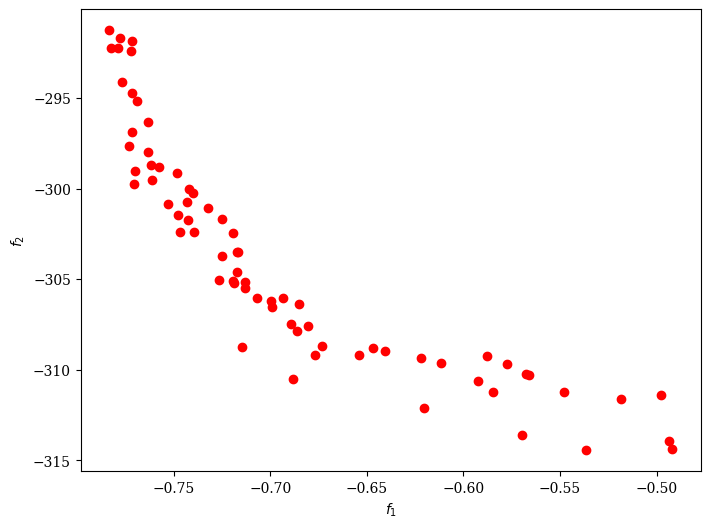

In [ ]:
import numpy as np
from pymoo.visualization.scatter import Scatter

# Assuming you have the NSGA-II results stored in the variable 'result'

# Extract the fitness values from the result object
fitness_values = np.array([ind.F for ind in res.pop])

# Plot the convergence of fitness scores
plot = Scatter()
plot.add(fitness_values, color="red")
plot.show()



### **Optimized completed versions**

**Optimized version1: Parallelized NSGA2 Multi-objective Optimization**

In [ ]:

def run_nsga2(subset_range, results):
    start_idx, end_idx = subset_range
    algorithm = NSGA2(
        pop_size=p_size,
        n_offsprings=n_off,
        sampling=MySampling(),
        crossover=MyCrossover(),
        mutation=MyMutation(),
        eliminate_duplicates=MyDuplicateElimination()
    )

    subset_res = minimize(problem, algorithm, ('n_gen', n_gen), verbose=False)
    results.append(subset_res)

subset_size = 100
num_subsets = 10
subset_ranges = [(i * subset_size, (i + 1) * subset_size) for i in range(num_subsets)]
if __name__ == '__main__':
    if multiprocessing.get_start_method() == 'spawn':
        multiprocessing.set_start_method('forkserver')

    results = []
    threads = []

    for subset_range in subset_ranges:
        t = threading.Thread(target=run_nsga2, args=(subset_range, results))
        t.start()
        threads.append(t)

    # Wait for all threads to finish
    for t in threads:
        t.join()
    elapsed_time = end_time - start_time

    best_solution = None
    best_gd = float('inf')
    best_gini = float('inf')

    for res in results:
        if res is not None and res.F[0] < best_gini and abs(res.F[1]) < best_gd:
            best_gini = res.F[0]
            best_gd = abs(res.F[1])
            best_solution = res

    if best_solution is not None:
        F = best_solution.F
        X = best_solution.X

        # Print the best solution and its objective values
        print("Best Solution:")
        print("F (Objective Values):", F)
        print("X (Decision Variables):", X)


**Optimized version: Multi-objective Optimization with NSGA2 using Concurrent.futures**

In [ ]:
import numpy as np
import concurrent.futures
# from pymoo import ElementwiseProblem
# from pymoo.operators.sampling.random_sampling import RandomSampling
# from pymoo.operators.crossover.point_crossover import PointCrossover
# from pymoo.operators.mutation.bitflip_mutation import BinaryBitflipMutation
# from pymoo.algorithms.nsga2 import NSGA2
# from pymoo.optimize import minimize
import random
import time
import numpy as np
import random

import time
ID=100
size_ind=100
n_gen=30
p_size=70
n_off=50
m_rate=0.7


# Calculate Gini score for a single solution
def gini_score(i):
    sum = 0
    for j in range(len(Output_probability[0])):
        sum += Output_probability[i][j] ** 2
    return 1 - sum

# Calculate geometric diversity for a single solution
def GD(IDs):
    x_sample = features[IDs]
    dot_p = np.dot(x_sample, x_sample.T)
    sign, Log_det = np.linalg.slogdet(dot_p)
    return Log_det

# Calculate fitness for a single solution
def evaluate_solution(x):
    print(x)
    x_array = np.array(x, dtype=int)  # Convert x to a NumPy array
    x_array = np.atleast_1d(x_array)
    # Calculate Gini scores for the selected indices in x
    gini_scores = [Gini_scores[c] for c in x_array]
    # Calculate the average Gini score
    ave_gini = np.mean(gini_scores)
    # Calculate the geometric diversity score for the selected indices
    div_score = GD(x_array)
    return [-ave_gini, -div_score]


# Parallel evaluation of fitness using concurrent.futures.ThreadPoolExecutor
def evaluate_population(population):
    with concurrent.futures.ThreadPoolExecutor(max_workers=multiprocessing.cpu_count()) as executor:
        fitness = list(executor.map(evaluate_solution, population))
    return np.array(fitness)

class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=size_ind, n_obj=2, n_constr=0, xl=0, xu=len(x_test)-1, type_var=list)

    def _evaluate(self, x, out, *args, **kwargs):
        fitness = evaluate_population(x)
        print(fitness[0])
        out["F"] = fitness

problem = MyProblem()

class MySampling(Sampling):

    def _do(self, problem, n_samples, **kwargs):
        X = np.random.choice(list(index_withoutnoisy), size=(n_samples, problem.n_var), replace=False)
        return X
class MyCrossover(Crossover):

    def __init__(self):
        super().__init__(n_parents=2, n_offsprings=2)

    def _do(self, problem, X, **kwargs):
        Y = np.empty_like(X, dtype=int)

        for k in range(X.shape[1]):
            a = X[0, k]
            b = X[1, k]
            crossoverpoint = random.randint(1, (X.shape[2] - 1))
            off1 = np.concatenate((a[:crossoverpoint], b[crossoverpoint:]))
            off2 = np.concatenate((b[:crossoverpoint], a[crossoverpoint:]))

            # Ensure uniqueness in offspring
            off1 = np.unique(off1)
            off2 = np.unique(off2)

            # Fill remaining slots with random values
            available_values = list(set(index_withoutnoisy) - set(off1))
            while len(off1) < problem.n_var:
                off1 = np.append(off1, random.choice(available_values))
            while len(off2) < problem.n_var:
                off2 = np.append(off2, random.choice(available_values))

            Y[0, k], Y[1, k] = off1, off2

        return Y


class MyMutation(Mutation):

    def _do(self, problem, X, **kwargs):
        mutation_rate = m_rate
        mut = np.copy(X)

        for i in range(len(X)):
            if random.random() <= mutation_rate:
                # Perform mutation
                xx = X[i]
                N_least = 5
                ff = len(xx) - N_least
                gd_scores_mut = []

                while ff < len(xx):
                    b = np.delete(xx, ff)
                    ss = GD(b)
                    gd_scores_mut.append(ss)
                    ff += 1

                max_index = gd_scores_mut.index(max(gd_scores_mut))
                available_values = list(set(index_withoutnoisy) - set(xx))
                replacement = random.choice(available_values)
                xx[max_index] = replacement
                mut[i] = xx

        return mut


class MyDuplicateElimination(ElementwiseDuplicateElimination):

    def is_equal(self, a, b):

      if all(a.X==b.X):
        return True
      else:
        return False

# Record the start time
start_time2 = time.time()

# Algorithm setup
algorithm = NSGA2(
    pop_size=p_size,
    n_offsprings=n_off,
    sampling=MySampling(),
    crossover=MyCrossover(),
    mutation=MyMutation(),
    eliminate_duplicates=MyDuplicateElimination()
)

# Solve the problem
res2 = minimize(problem, algorithm, ('n_gen', n_gen), verbose=False)

F2 = res2.F
X2 = res2.X


Streaming output truncated to the last 5000 lines.
3368

4198
3939
3577
175
6225
1451
7144
2229
9387
9089
9196
94656975
2336
272
7780
9792
6697
5462
1315

3730
43517588
8657
3810
91079074
5408
3421
2989
9371
57537666
5686
8073
6931
2628
6568
517
5933
8213
1316
1713
9304
7542
4714
1352
2021



[-0.70398842 -4.86798048]
5498
2077
9170
3874
7733
88486679
59076801
7237
7203
2169


8674
5198
925
6485
9132
9317
4530
5239
1083
7717
3190
8389
9431
2884
2384
5852
8539
57434388

5203
2253
9072
2951
6094
2440
4125
4861
3804
103
9990
4925
6861
9940
3169
1265
4552
5246
1467
2822
36005711

26794583982
2837
903

633
7567
7663
5716

402
822925885336
196670
8829
7544

7183
134
3601
7305

3074
3488
61
645
115
58
4681
2364
580
3095
7515
9955
9039
6687
485
774
8367
1893

6188
5127
4085
2209
3321
2323
76296651

[-0.0525748  -4.75063086]
5670
436
5814
2803
8314
2616
8005
1938
8371
2769
4222
2392
6222
6105
1905
9342
8381
1084
2534
2682
3217
6283
417
3819
6938
2400
7773
8077
56
9365
3896
9836
2344
4960
9976
6

Exception: ignored

# **Analysing and Visualizing of the results**

### Loading the results

In [ ]:
#################################################################Loading results of NsgaII#######################################################################
###################################################you can chnage the size of selected subset######################################################################

################################################## IDD from 1 to 10 (10 different repeation of the method) ############################################################

# F= np.load(str(Your_google_drive_path)+"/Result_DeepGD/"+ str(data_name)+"_"+str(model_name) +"/Fitness_S"+str(size_ind)+"ID"+str(ID)+"P700Of500n300M0.7.npy")
# X=np.load(str(Your_google_drive_path)+"/Result_DeepGD/"+ str(data_name)+"_"+str(model_name) +"/X_S"+str(size_ind)+"ID"+str(ID)+"P700Of500n300M0.7.npy", allow_pickle=True)


# **Selecting the best individual**
# **(we have all final subsets on pareto front)**

You can try different methods for selecting the best individual from pareto front:

In [ ]:
size_ind=300
F=[]
X=[]
for ID in set(range(10))-{7,2,3}:
  F.append(np.load(str(Your_google_drive_path)+"/Result_DeepGD/"+ str(data_name)+"_"+str(model_name) +"/Fitness_S"+str(size_ind)+"ID"+str(ID)+"P700Of500n300M0.7.npy"))
  X.append(np.load(str(Your_google_drive_path)+"/Result_DeepGD/"+ str(data_name)+"_"+str(model_name) +"/X_S"+str(size_ind)+"ID"+str(ID)+"P700Of500n300M0.7.npy", allow_pickle=True))


In [ ]:
for i in range(len(X)):
  print(faults(len(X[i][0]), X[i][0], mis_ind_test)[1])
for i in range(len(X)):
  print(faults(len(X[i][0]), X[i][0], mis_ind_test)[2])

In [ ]:
from pymoo.visualization.scatter import Scatter

print("Function value: %s" % F)
#sort based on the highest gini score
# results = X[0][np.argsort(F[0][:, 0])]
# print(results)
a=[]
b=[]
c=[]
FF=F
XX=X
gg=np.zeros((len(FF), 4))
for i in range(len(FF)):
  # rr=XX[np.argsort(FF[:,0])][i]
  fa,_,mis=faults(len(XX[i]), XX[i], mis_ind_test)
  kk=copy.deepcopy(FF)
  jj=list(kk[i])
  jj.append(int(fa))
  jj.append(int(mis))
  gg[i]=jj

from tabulate import tabulate
col_names = ["Gini score", "Diversity score", "Number of faults","Number of mispredicted inputs"]

#display table
print(tabulate(gg, headers=col_names, tablefmt="fancy_grid"))




In [ ]:
Scatter().add(FF*-1).show()

first method
Optimal selected naswer: Number of fault in the final selected subset: 34 the number of mispredicted inputs in the final subset 57
second method
Optimal selected naswer: Number of faults in the final selected subset: 32 the number of mispredicted inputs in the final subset 54
Best regarding Pseudo Weights: Point 
i = 8
F = [  -0.86122883 -300.74608159]


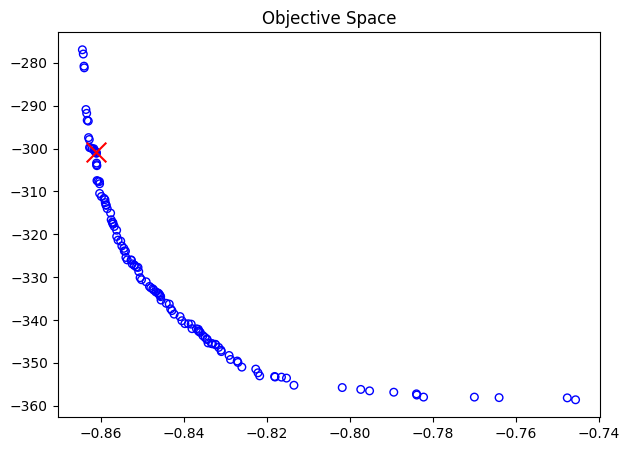

In [ ]:
from pymoo.visualization.scatter import Scatter

# selecting from pareto front
# Op1
print("first method")
_,NumFault,NumMis=faults(len(XX[0]), XX[0], mis_ind_test)
print("Optimal selected naswer:", "Number of fault in the final selected subset:" ,NumFault,"the number of mispredicted inputs in the final subset", NumMis)
#Op2
print("second method")
_,NumFault,NumMis=faults(len(XX[i]), XX[i], mis_ind_test)
print("Optimal selected naswer:", "Number of faults in the final selected subset:" ,NumFault,"the number of mispredicted inputs in the final subset", NumMis)
fl = FF.min(axis=0)
fu = FF.max(axis=0)
approx_ideal = FF.min(axis=0)
approx_nadir = FF.max(axis=0)
nF = (FF - approx_ideal) / (approx_nadir - approx_ideal)
fl = nF.min(axis=0)
fu = nF.max(axis=0)

opt_rate=0.77
weights = np.array([opt_rate, 1-opt_rate])
from pymoo.mcdm.pseudo_weights import PseudoWeights

i = PseudoWeights(weights).do(nF)
print("Best regarding Pseudo Weights: Point \ni = %s\nF = %s" % (i, FF[i]))
loc_ind=[x for x, y in enumerate(a) if y[0] == FF[i][0]]
# print(X[loc_ind[0]])
plt.figure(figsize=(7, 5))
plt.scatter(FF[:, 0], FF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(FF[i, 0], FF[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

def find_knee_point(pareto_front):
    num_points = pareto_front.shape[0]

    # Calculate distances to the nearest neighbors for each point
    distances = cdist(pareto_front, pareto_front)
    min_distances = np.min(distances + np.eye(num_points) * np.inf, axis=1)

    # Find the point with the maximum minimum distance (the knee point)
    knee_point_index = np.argmax(min_distances)

    return pareto_front[knee_point_index], knee_point_index

# Example pareto front data (replace this with your data)


knee_point, indd = find_knee_point(F)
print("Knee Point:", knee_point, faults(500, X[indd], mis_ind_test))

[[  -0.76793023 -749.60612734]
 [  -0.79519766 -703.79928139]
 [  -0.7626746  -756.54014826]] (53, 53, 159)


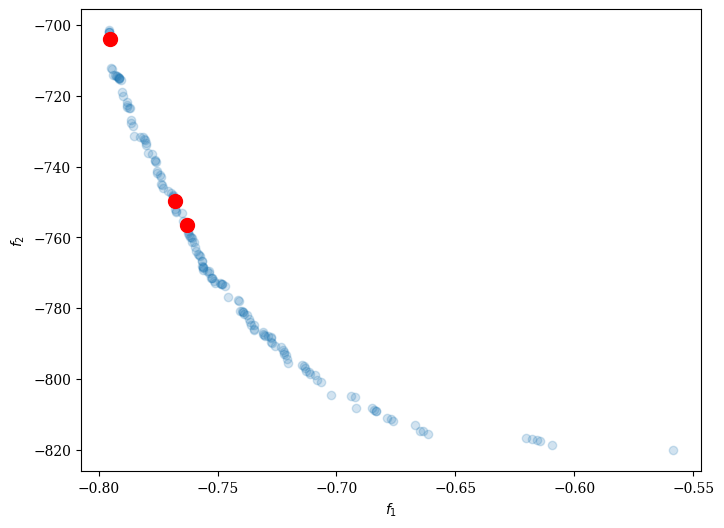

In [ ]:
import os

import numpy as np
from pymoo.visualization.scatter import Scatter
from pymoo.mcdm.high_tradeoff import HighTradeoffPoints


dm = HighTradeoffPoints()

I = dm(F)
print(F[I], faults(size_ind,X[I[2]],mis_ind_test))
plot = Scatter()
plot.add(F, alpha=0.2)
plot.add(F[I], color="red", s=100)
plot.show()